In [13]:
from google.colab import drive
# from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd

# Load the dataset (replace 'path_to_your_dataset.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/Skin lesion detection and classification/hmnist_64_64_RBG.csv')

# Specify the label column name
label_column = 'label'  # Change this to match the actual name of your label column

# Separate features and label
features = data.drop(columns=[label_column])

# Replace zeros with column means in the feature columns
features = features.apply(lambda col: col.mask(col == 0, col.mean()), axis=0)

# Recombine the features and label
preprocessed_data = pd.concat([features, data[label_column]], axis=1)

# # Save the preprocessed dataset to a new file
# preprocessed_data.to_csv('preprocessed_ham10000.csv', index=False)

# print("Preprocessing complete. Zero values replaced with column means.")


In [15]:
print(preprocessed_data)

           0      1      2      3      4      5      6      7      8      9  \
0      191.0  152.0  194.0  191.0  153.0  195.0  192.0  149.0  192.0  194.0   
1       24.0   13.0   23.0   24.0   14.0   28.0   37.0   24.0   46.0   61.0   
2      185.0  129.0  140.0  192.0  136.0  151.0  198.0  142.0  156.0  198.0   
3       24.0   11.0   19.0   36.0   19.0   30.0   64.0   38.0   50.0   91.0   
4      138.0   94.0  117.0  158.0  113.0  138.0  178.0  133.0  161.0  191.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10010  161.0  142.0  154.0  159.0  142.0  153.0  153.0  136.0  147.0  151.0   
10011    6.0    6.0    4.0    7.0    8.0    6.0    8.0    8.0    6.0   28.0   
10012  116.0  107.0  109.0  141.0  128.0  128.0  133.0  117.0  113.0  156.0   
10013  159.0  123.0  145.0  156.0  115.0  133.0  161.0  130.0  150.0  165.0   
10014  176.0  144.0  132.0  177.0  143.0  128.0  180.0  149.0  130.0  181.0   

       ...  12279  12280  12281  12282  12283  1228

In [16]:
print(preprocessed_data.shape)

(10015, 12289)


In [17]:
import pandas as pd

# Load the dataset (replace 'path_to_your_dataset.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/Skin lesion detection and classification/hmnist_64_64_RBG.csv')

# Specify the label column name
label_column = 'label'  # Change this to match the actual name of your label column

# Check and print the count of zeros in each column before preprocessing
zero_counts = (data == 0).sum()
print("Count of zeros in each column before preprocessing:")
print(zero_counts)

# Separate features and label
features = data.drop(columns=[label_column])

# Replace zeros with column means in the feature columns
features = features.apply(lambda col: col.mask(col == 0, col.mean()), axis=0)

# Recombine the features and label
preprocessed_data = pd.concat([features, data[label_column]], axis=1)

# Check and print the count of zeros in each column after preprocessing
zero_counts_after = (preprocessed_data == 0).sum()
print("Count of zeros in each column after preprocessing:")
print(zero_counts_after)


Count of zeros in each column before preprocessing:
0         244
1         249
2         245
3         225
4         227
         ... 
12284     203
12285     215
12286     228
12287     224
label    8061
Length: 12289, dtype: int64
Count of zeros in each column after preprocessing:
0           0
1           0
2           0
3           0
4           0
         ... 
12284       0
12285       0
12286       0
12287       0
label    8061
Length: 12289, dtype: int64


In [18]:
zero_count = (features == 0).sum().sum()
print(f"Number of zeros in the dataset: {zero_count}")

Number of zeros in the dataset: 0


In [19]:
# Save the preprocessed dataset to a new file
preprocessed_data.to_csv('preprocessed_ham10000.csv', index=False)

print("Preprocessing complete. Zero values replaced with column means.")

Preprocessing complete. Zero values replaced with column means.


In [20]:
print(preprocessed_data)

           0      1      2      3      4      5      6      7      8      9  \
0      191.0  152.0  194.0  191.0  153.0  195.0  192.0  149.0  192.0  194.0   
1       24.0   13.0   23.0   24.0   14.0   28.0   37.0   24.0   46.0   61.0   
2      185.0  129.0  140.0  192.0  136.0  151.0  198.0  142.0  156.0  198.0   
3       24.0   11.0   19.0   36.0   19.0   30.0   64.0   38.0   50.0   91.0   
4      138.0   94.0  117.0  158.0  113.0  138.0  178.0  133.0  161.0  191.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10010  161.0  142.0  154.0  159.0  142.0  153.0  153.0  136.0  147.0  151.0   
10011    6.0    6.0    4.0    7.0    8.0    6.0    8.0    8.0    6.0   28.0   
10012  116.0  107.0  109.0  141.0  128.0  128.0  133.0  117.0  113.0  156.0   
10013  159.0  123.0  145.0  156.0  115.0  133.0  161.0  130.0  150.0  165.0   
10014  176.0  144.0  132.0  177.0  143.0  128.0  180.0  149.0  130.0  181.0   

       ...  12279  12280  12281  12282  12283  1228

In [22]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
features_resampled, labels_resampled = undersampler.fit_resample(features, labels)

# Check new label distribution
print("Balanced label distribution after undersampling:")
print(pd.Series(labels_resampled).value_counts())


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Balanced label distribution after undersampling:
label
0    1954
1    1954
Name: count, dtype: int64


Number of zeros in the dataset: 47097
Label distribution:
label
0    8061
1    1954
Name: count, dtype: int64
Confusion Matrix:
[[8061    0]
 [1954    0]]


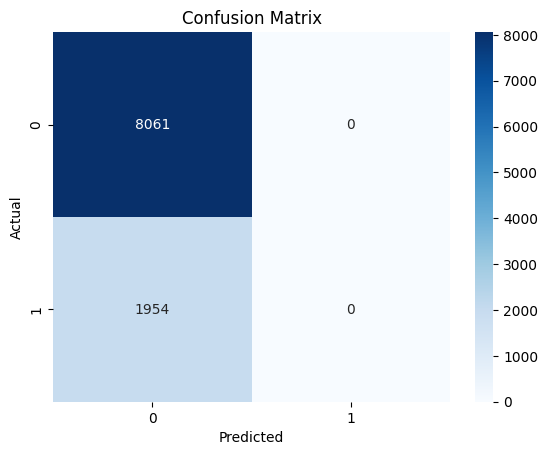

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Balanced label distribution after applying SMOTE and resampling to maintain size:
label
0    5060
1    4955
Name: count, dtype: int64
Preprocessing and balancing complete. Dataset saved to 'undersampled_balanced_ham10000.csv'.


In [23]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'path_to_your_dataset.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/Skin lesion detection and classification/hmnist_64_64_RBG.csv')

# Specify the label column name
label_column = 'label'  # Change this to match the actual name of your label column

# Separate features and label
features = data.drop(columns=[label_column])
labels = data[label_column]

# Count and print the number of zeros in the dataset
zero_count = (features == 0).sum().sum()
print(f"Number of zeros in the dataset: {zero_count}")

# Check if the dataset is balanced in the label column
label_counts = labels.value_counts()
print("Label distribution:")
print(label_counts)

# Generate a confusion matrix for a dummy prediction (for demonstration purposes)
# Assuming a binary classification and predicting all zeros as a naive model
dummy_predictions = [0] * len(labels)
cm = confusion_matrix(labels, dummy_predictions)

# Print and visualize the confusion matrix
print("Confusion Matrix:")
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_counts.index, yticklabels=label_counts.index)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Apply SMOTE to balance the dataset without reducing the total number of records
smote = SMOTE(random_state=42, sampling_strategy='auto')
features_resampled, labels_resampled = smote.fit_resample(features, labels)

# Randomly sample the majority class to match the original dataset size
resampled_data = pd.concat([features_resampled, labels_resampled], axis=1).sample(n=len(data), random_state=42)

# Check new label distribution
balanced_label_counts = resampled_data[label_column].value_counts()
print("Balanced label distribution after applying SMOTE and resampling to maintain size:")
print(balanced_label_counts)

# Replace zeros with column means in the resampled feature columns
features_resampled = resampled_data.drop(columns=[label_column]).apply(lambda col: col.mask(col == 0, col.mean()), axis=0)
labels_resampled = resampled_data[label_column]

# Recombine the resampled features and labels
balanced_data = pd.concat([features_resampled, labels_resampled], axis=1)

# # Save the balanced dataset to a new file
balanced_data.to_csv('undersampled_balanced_ham10000.csv', index=False)

print("Preprocessing and balancing complete. Dataset saved to 'undersampled_balanced_ham10000.csv'.")


In [24]:
print(balanced_data.shape)

(10015, 12289)
